In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# for statistical testing
from scipy.stats import shapiro
from scipy.stats import jarque_bera
from scipy.stats import mannwhitneyu


# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Executive Summary

> **Something goes here.**

### PLANNING

- [X] Planning
- [X] Acquire data
- [x] Prepare the data
- [x] Explore the data
- [ ] Modeling

In [2]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

In [3]:
def get_values(df, columns):
    """
    Take a dataframe and a list of columns and
    returns the value counts for the columns.
    """
    for column in columns:
        print(column)
        print('=====================================')
        print(df[column].value_counts(dropna=False))
        print('\n')

def show_values(df, param):
    if param == 'all':
        get_values(df, df.columns)
    else:
        get_values(df, param)

In [4]:
def convert_datatype(df, column, totype):
    df[column] = df[column].astype(totype)
    return df

### ACQUIRE DATA

In [5]:
# Read csv file
df = pd.read_csv('../data/inter/03 - trimmed_combined_peims_staar_2019.csv')

In [6]:
df.shape

(3590, 36)

### PREPARATION

In [7]:
df = df.drop(columns=['YEAR',
                      'ALL FUNDS-TOTAL OPERATE EXPEND BY FUNCTION',
                      'ALL FUNDS-TOT NON-OPER EXPEND BY FUNCTION',
                      'ALL FUNDS-TOTAL PROGRAM OPERATING EXPENDITURES'
                     ])

In [8]:
df = convert_datatype(df, 'DISTRICT', 'str')

In [9]:
df['DISTRICT'] = df['DISTRICT'].str.zfill(6)

In [10]:
df.head()

,DISTRICT,TARGET,ALL FUNDS-TOTAL PAYROLL EXPENDITURES,ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES,ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES,"ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95","ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12","ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","ALL FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21","ALL FUNDS-CAMPUS ADMINISTRATION EXPEND, FCT23","ALL FUNDS-GUIDANCE 7 COUNSELING SERVICES EXP, FCT31","ALL FUNDS-SOCIAL WORK SERVICES EXP, FCT32","ALL FUNDS-HEALTH SERVICES EXP, FCT33","ALL FUNDS-TRANSPORTATION EXPENDITURES, FCT34","ALL FUNDS-FOOD SERVICE EXPENDITURES, FCT35","ALL FUNDS-EXTRACURRICULAR EXPENDITURES,FCT36","ALL FUNDS-GENERAL ADMINISTRAT EXPEND-FCT41,80,92","ALL FUNDS-PLANT MAINTENANCE/OPERA EXPEND, FCT51","ALL FUNDS-SECURITY/MONITORING SERVICE EXPEND, FCT5","ALL FUNDS-DATA PROCESSING SERVICES, FCT53","ALL FUNDS-COMMUNITY SERVICES, FCT61",ALL FUNDS-REGULAR PROGRAM EXPEND--11,ALL FUNDS-GIFTED/TALENTED PROGRAM EXPEND--21,ALL FUNDS-CAREER & TECHNOLOGY PGM EXPEND--22,ALL FUNDS-STUDENTS WITH DISABILITIES PGM EXPEND--23,"ALL FUNDS-STATE COMPENSATORY ED EXPEND--24, 29, 30, 34",ALL FUNDS-BILINGUAL PROGRAM EXP--25,ALL FUNDS-HIGH SCHOOL ALLOTMENT PROGRAM--91,"ALL FUNDS-PREKINDERGARTEN--32,35",ALL FUNDS-ATHLETICS PROGRAM--91,ALL FUNDS-UNDISTRIBUTED PROGRAM EXP--99
0,001902,0,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660
1,001902,0,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660
2,001902,1,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660
3,001903,0,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276
4,001903,0,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276


In [11]:
df.head().T

,0,1,2,3,4
DISTRICT,001902,001902,001902,001903,001903
TARGET,0,0,1,0,0
ALL FUNDS-TOTAL PAYROLL EXPENDITURES,6025217,6025217,6025217,9093950,9093950
ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,1075904,1075904,1075904,1514689,1514689
ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES,648206,648206,648206,784631,784631
ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES,809559,809559,809559,303052,303052
"ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95",4649118,4649118,4649118,7043892,7043892
"ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12",66490,66490,66490,117860,117860
"ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13",4986,4986,4986,33175,33175
"ALL FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21",270353,270353,270353,66374,66374


In [12]:
show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
DISTRICT,0,0.0,0,0.0,0,0.0
TARGET,0,0.0,0,0.0,0,0.0
ALL FUNDS-TOTAL PAYROLL EXPENDITURES,0,0.0,0,0.0,0,0.0
ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,0,0.0,0,0.0,0,0.0
ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES,0,0.0,0,0.0,0,0.0
ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES,0,0.0,0,0.0,0,0.0
"ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95",0,0.0,0,0.0,0,0.0
"ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12",0,0.0,0,0.0,0,0.0
"ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13",0,0.0,0,0.0,0,0.0
"ALL FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21",0,0.0,0,0.0,0,0.0


In [13]:
dfx = df.drop(columns=['DISTRICT'])
dfx = dfx.dropna()
dfx.shape
dfx.head()

(3590, 31)

,TARGET,ALL FUNDS-TOTAL PAYROLL EXPENDITURES,ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES,ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES,"ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95","ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12","ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","ALL FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21","ALL FUNDS-CAMPUS ADMINISTRATION EXPEND, FCT23","ALL FUNDS-GUIDANCE 7 COUNSELING SERVICES EXP, FCT31","ALL FUNDS-SOCIAL WORK SERVICES EXP, FCT32","ALL FUNDS-HEALTH SERVICES EXP, FCT33","ALL FUNDS-TRANSPORTATION EXPENDITURES, FCT34","ALL FUNDS-FOOD SERVICE EXPENDITURES, FCT35","ALL FUNDS-EXTRACURRICULAR EXPENDITURES,FCT36","ALL FUNDS-GENERAL ADMINISTRAT EXPEND-FCT41,80,92","ALL FUNDS-PLANT MAINTENANCE/OPERA EXPEND, FCT51","ALL FUNDS-SECURITY/MONITORING SERVICE EXPEND, FCT5","ALL FUNDS-DATA PROCESSING SERVICES, FCT53","ALL FUNDS-COMMUNITY SERVICES, FCT61",ALL FUNDS-REGULAR PROGRAM EXPEND--11,ALL FUNDS-GIFTED/TALENTED PROGRAM EXPEND--21,ALL FUNDS-CAREER & TECHNOLOGY PGM EXPEND--22,ALL FUNDS-STUDENTS WITH DISABILITIES PGM EXPEND--23,"ALL FUNDS-STATE COMPENSATORY ED EXPEND--24, 29, 30, 34",ALL FUNDS-BILINGUAL PROGRAM EXP--25,ALL FUNDS-HIGH SCHOOL ALLOTMENT PROGRAM--91,"ALL FUNDS-PREKINDERGARTEN--32,35",ALL FUNDS-ATHLETICS PROGRAM--91,ALL FUNDS-UNDISTRIBUTED PROGRAM EXP--99
0,0,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660
1,0,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660
2,1,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660
3,0,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276
4,0,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276


In [14]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3590 entries, 0 to 3589
Data columns (total 31 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   TARGET                                                           3590 non-null   int64
 1   ALL FUNDS-TOTAL PAYROLL EXPENDITURES                             3590 non-null   int64
 2   ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES  3590 non-null   int64
 3   ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES                3590 non-null   int64
 4   ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES                     3590 non-null   int64
 5   ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95                 3590 non-null   int64
 6   ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12                  3590 non-null   int64
 7   ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13           

### EXPLORATION

In [15]:
for col in dfx.columns:
    stat, p = shapiro(dfx[col])
    if p > 0.05:
        print(col + 'Probably Gaussian')
    else:
        print(col + 'Probably NOT Gaussian')

TARGETProbably NOT Gaussian
ALL FUNDS-TOTAL PAYROLL EXPENDITURESProbably NOT Gaussian
ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURESProbably NOT Gaussian
ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURESProbably NOT Gaussian
ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURESProbably NOT Gaussian
ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95Probably NOT Gaussian
ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12Probably NOT Gaussian
ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13Probably NOT Gaussian
ALL FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21Probably NOT Gaussian
ALL FUNDS-CAMPUS ADMINISTRATION EXPEND, FCT23Probably NOT Gaussian
ALL FUNDS-GUIDANCE 7 COUNSELING SERVICES EXP, FCT31Probably NOT Gaussian
ALL FUNDS-SOCIAL WORK SERVICES EXP, FCT32Probably NOT Gaussian
ALL FUNDS-HEALTH SERVICES EXP, FCT33Probably NOT Gaussian
ALL FUNDS-TRANSPORTATION EXPENDITURES, FCT34Probably NOT Gaussian
ALL FUNDS-FOOD SERVICE EXPENDITURES, FCT35Probably NOT Gaussian
ALL FUNDS-EXTRACURRICULAR E

In [16]:
for col in dfx.columns:
    stat, p = jarque_bera(dfx[col])
    if p > 0.05:
        print(col + 'Probably Gaussian')
    else:
        print(col + 'Probably NOT Gaussian')

TARGETProbably NOT Gaussian
ALL FUNDS-TOTAL PAYROLL EXPENDITURESProbably NOT Gaussian
ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURESProbably NOT Gaussian
ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURESProbably NOT Gaussian
ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURESProbably NOT Gaussian
ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95Probably NOT Gaussian
ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12Probably NOT Gaussian
ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13Probably NOT Gaussian
ALL FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21Probably NOT Gaussian
ALL FUNDS-CAMPUS ADMINISTRATION EXPEND, FCT23Probably NOT Gaussian
ALL FUNDS-GUIDANCE 7 COUNSELING SERVICES EXP, FCT31Probably NOT Gaussian
ALL FUNDS-SOCIAL WORK SERVICES EXP, FCT32Probably NOT Gaussian
ALL FUNDS-HEALTH SERVICES EXP, FCT33Probably NOT Gaussian
ALL FUNDS-TRANSPORTATION EXPENDITURES, FCT34Probably NOT Gaussian
ALL FUNDS-FOOD SERVICE EXPENDITURES, FCT35Probably NOT Gaussian
ALL FUNDS-EXTRACURRICULAR E

(array([2394.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1196.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

(array([3.389e+03, 1.050e+02, 4.800e+01, 2.400e+01, 1.200e+01, 6.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00]),
 array([1.00000000e+00, 1.49115703e+08, 2.98231405e+08, 4.47347106e+08,
        5.96462808e+08, 7.45578510e+08, 8.94694212e+08, 1.04380991e+09,
        1.19292562e+09, 1.34204132e+09, 1.49115702e+09]),
 <BarContainer object of 10 artists>)

(array([3.491e+03, 8.700e+01, 6.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([6.31660000e+04, 2.95234786e+07, 5.89837912e+07, 8.84441038e+07,
        1.17904416e+08, 1.47364729e+08, 1.76825042e+08, 2.06285354e+08,
        2.35745667e+08, 2.65205979e+08, 2.94666292e+08]),
 <BarContainer object of 10 artists>)

(array([3377.,   99.,   63.,   27.,   12.,    6.,    0.,    0.,    0.,
           6.]),
 array([1.42270000e+04, 1.47048102e+07, 2.93953934e+07, 4.40859766e+07,
        5.87765598e+07, 7.34671430e+07, 8.81577262e+07, 1.02848309e+08,
        1.17538893e+08, 1.32229476e+08, 1.46920059e+08]),
 <BarContainer object of 10 artists>)

(array([3.401e+03, 1.200e+02, 3.900e+01, 1.800e+01, 3.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([5.37300000e+03, 5.05018950e+06, 1.00950060e+07, 1.51398225e+07,
        2.01846390e+07, 2.52294555e+07, 3.02742720e+07, 3.53190885e+07,
        4.03639050e+07, 4.54087215e+07, 5.04535380e+07]),
 <BarContainer object of 10 artists>)

(array([3.395e+03, 1.020e+02, 5.100e+01, 2.100e+01, 9.000e+00, 6.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([1.99523000e+05, 1.08691870e+08, 2.17184216e+08, 3.25676563e+08,
        4.34168909e+08, 5.42661256e+08, 6.51153603e+08, 7.59645949e+08,
        8.68138296e+08, 9.76630642e+08, 1.08512299e+09]),
 <BarContainer object of 10 artists>)

(array([3.371e+03, 8.700e+01, 5.400e+01, 4.200e+01, 1.500e+01, 1.200e+01,
        3.000e+00, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([       0. ,  1864707.9,  3729415.8,  5594123.7,  7458831.6,
         9323539.5, 11188247.4, 13052955.3, 14917663.2, 16782371.1,
        18647079. ]),
 <BarContainer object of 10 artists>)

(array([3.431e+03, 1.020e+02, 2.400e+01, 1.800e+01, 3.000e+00, 6.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00]),
 array([       0. ,  6050323.5, 12100647. , 18150970.5, 24201294. ,
        30251617.5, 36301941. , 42352264.5, 48402588. , 54452911.5,
        60503235. ]),
 <BarContainer object of 10 artists>)

(array([3.413e+03, 1.200e+02, 3.000e+01, 9.000e+00, 9.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00]),
 array([-7.12000000e+02,  3.89117960e+06,  7.78307120e+06,  1.16749628e+07,
         1.55668544e+07,  1.94587460e+07,  2.33506376e+07,  2.72425292e+07,
         3.11344208e+07,  3.50263124e+07,  3.89182040e+07]),
 <BarContainer object of 10 artists>)

(array([3.431e+03, 9.600e+01, 3.900e+01, 1.800e+01, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([0.00000000e+00, 1.45714852e+07, 2.91429704e+07, 4.37144556e+07,
        5.82859408e+07, 7.28574260e+07, 8.74289112e+07, 1.02000396e+08,
        1.16571882e+08, 1.31143367e+08, 1.45714852e+08]),
 <BarContainer object of 10 artists>)

(array([3.38e+03, 8.40e+01, 6.30e+01, 3.00e+01, 1.20e+01, 1.20e+01,
        0.00e+00, 3.00e+00, 0.00e+00, 6.00e+00]),
 array([       0. ,  6760156.7, 13520313.4, 20280470.1, 27040626.8,
        33800783.5, 40560940.2, 47321096.9, 54081253.6, 60841410.3,
        67601567. ]),
 <BarContainer object of 10 artists>)

(array([3.464e+03, 7.800e+01, 1.500e+01, 1.500e+01, 3.000e+00, 6.000e+00,
        3.000e+00, 0.000e+00, 3.000e+00, 3.000e+00]),
 array([      0. ,  974178.6, 1948357.2, 2922535.8, 3896714.4, 4870893. ,
        5845071.6, 6819250.2, 7793428.8, 8767607.4, 9741786. ]),
 <BarContainer object of 10 artists>)

(array([3.428e+03, 8.400e+01, 4.800e+01, 1.200e+01, 9.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00]),
 array([       0. ,  2379625.7,  4759251.4,  7138877.1,  9518502.8,
        11898128.5, 14277754.2, 16657379.9, 19037005.6, 21416631.3,
        23796257. ]),
 <BarContainer object of 10 artists>)

(array([3.392e+03, 1.110e+02, 5.700e+01, 9.000e+00, 3.000e+00, 9.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 3.000e+00]),
 array([       0. ,  6056307.5, 12112615. , 18168922.5, 24225230. ,
        30281537.5, 36337845. , 42394152.5, 48450460. , 54506767.5,
        60563075. ]),
 <BarContainer object of 10 artists>)

(array([3.428e+03, 1.020e+02, 3.600e+01, 1.200e+01, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00]),
 array([0.00000000e+00, 1.27747054e+07, 2.55494108e+07, 3.83241162e+07,
        5.10988216e+07, 6.38735270e+07, 7.66482324e+07, 8.94229378e+07,
        1.02197643e+08, 1.14972349e+08, 1.27747054e+08]),
 <BarContainer object of 10 artists>)

(array([3.251e+03, 1.680e+02, 5.400e+01, 6.000e+01, 3.300e+01, 1.200e+01,
        6.000e+00, 0.000e+00, 3.000e+00, 3.000e+00]),
 array([       0. ,  3255289.3,  6510578.6,  9765867.9, 13021157.2,
        16276446.5, 19531735.8, 22787025.1, 26042314.4, 29297603.7,
        32552893. ]),
 <BarContainer object of 10 artists>)

(array([3.362e+03, 1.320e+02, 6.300e+01, 1.500e+01, 9.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 6.000e+00]),
 array([4.35440000e+04, 4.72329630e+06, 9.40304860e+06, 1.40828009e+07,
        1.87625532e+07, 2.34423055e+07, 2.81220578e+07, 3.28018101e+07,
        3.74815624e+07, 4.21613147e+07, 4.68410670e+07]),
 <BarContainer object of 10 artists>)

(array([3.395e+03, 1.230e+02, 4.500e+01, 1.200e+01, 9.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([1.83300000e+03, 1.94405518e+07, 3.88792706e+07, 5.83179894e+07,
        7.77567082e+07, 9.71954270e+07, 1.16634146e+08, 1.36072865e+08,
        1.55511583e+08, 1.74950302e+08, 1.94389021e+08]),
 <BarContainer object of 10 artists>)

(array([3.41e+03, 9.00e+01, 4.80e+01, 2.40e+01, 6.00e+00, 6.00e+00,
        0.00e+00, 0.00e+00, 3.00e+00, 3.00e+00]),
 array([       0.,  2393368.,  4786736.,  7180104.,  9573472., 11966840.,
        14360208., 16753576., 19146944., 21540312., 23933680.]),
 <BarContainer object of 10 artists>)

(array([3.476e+03, 8.400e+01, 1.800e+01, 6.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([       0. ,  5542493.8, 11084987.6, 16627481.4, 22169975.2,
        27712469. , 33254962.8, 38797456.6, 44339950.4, 49882444.2,
        55424938. ]),
 <BarContainer object of 10 artists>)

(array([3.5e+03, 5.7e+01, 3.0e+00, 1.2e+01, 9.0e+00, 6.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 3.0e+00]),
 array([-6.50000000e+02,  2.00313270e+06,  4.00691540e+06,  6.01069810e+06,
         8.01448080e+06,  1.00182635e+07,  1.20220462e+07,  1.40258289e+07,
         1.60296116e+07,  1.80333943e+07,  2.00371770e+07]),
 <BarContainer object of 10 artists>)

(array([3.386e+03, 1.020e+02, 4.800e+01, 3.000e+01, 1.200e+01, 3.000e+00,
        3.000e+00, 0.000e+00, 3.000e+00, 3.000e+00]),
 array([5.49300000e+04, 8.24968667e+07, 1.64938803e+08, 2.47380740e+08,
        3.29822677e+08, 4.12264614e+08, 4.94706550e+08, 5.77148487e+08,
        6.59590424e+08, 7.42032360e+08, 8.24474297e+08]),
 <BarContainer object of 10 artists>)

(array([3.461e+03, 6.300e+01, 3.300e+01, 9.000e+00, 6.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 6.000e+00, 6.000e+00]),
 array([       0. ,  2228343.2,  4456686.4,  6685029.6,  8913372.8,
        11141716. , 13370059.2, 15598402.4, 17826745.6, 20055088.8,
        22283432. ]),
 <BarContainer object of 10 artists>)

(array([3.332e+03, 1.170e+02, 5.100e+01, 5.700e+01, 1.800e+01, 6.000e+00,
        3.000e+00, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([       0. ,  4228501.4,  8457002.8, 12685504.2, 16914005.6,
        21142507. , 25371008.4, 29599509.8, 33828011.2, 38056512.6,
        42285014. ]),
 <BarContainer object of 10 artists>)

(array([3.383e+03, 8.400e+01, 5.100e+01, 3.900e+01, 1.200e+01, 9.000e+00,
        0.000e+00, 6.000e+00, 3.000e+00, 3.000e+00]),
 array([0.00000000e+00, 2.08755073e+07, 4.17510146e+07, 6.26265219e+07,
        8.35020292e+07, 1.04377536e+08, 1.25253044e+08, 1.46128551e+08,
        1.67004058e+08, 1.87879566e+08, 2.08755073e+08]),
 <BarContainer object of 10 artists>)

(array([3.47e+03, 7.50e+01, 3.00e+01, 6.00e+00, 3.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 3.00e+00, 3.00e+00]),
 array([0.00000000e+00, 2.44349957e+07, 4.88699914e+07, 7.33049871e+07,
        9.77399828e+07, 1.22174978e+08, 1.46609974e+08, 1.71044970e+08,
        1.95479966e+08, 2.19914961e+08, 2.44349957e+08]),
 <BarContainer object of 10 artists>)

(array([3.524e+03, 5.100e+01, 9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([       0.        ,  6450986.4       , 12901972.8       ,
        19352959.2       , 25803945.6       , 32254932.        ,
        38705918.40000001, 45156904.8       , 51607891.2       ,
        58058877.6       , 64509864.        ]),
 <BarContainer object of 10 artists>)

(array([3362.,  117.,   51.,   21.,   18.,    9.,    6.,    0.,    0.,
           6.]),
 array([       0. ,  1876006.3,  3752012.6,  5628018.9,  7504025.2,
         9380031.5, 11256037.8, 13132044.1, 15008050.4, 16884056.7,
        18760063. ]),
 <BarContainer object of 10 artists>)

(array([3.461e+03, 7.500e+01, 2.100e+01, 9.000e+00, 6.000e+00, 6.000e+00,
        6.000e+00, 0.000e+00, 3.000e+00, 3.000e+00]),
 array([       0. ,  2994260.2,  5988520.4,  8982780.6, 11977040.8,
        14971301. , 17965561.2, 20959821.4, 23954081.6, 26948341.8,
        29942602. ]),
 <BarContainer object of 10 artists>)

(array([3.206e+03, 1.860e+02, 8.100e+01, 5.700e+01, 2.700e+01, 1.200e+01,
        6.000e+00, 9.000e+00, 3.000e+00, 3.000e+00]),
 array([       0. ,  1879105.7,  3758211.4,  5637317.1,  7516422.8,
         9395528.5, 11274634.2, 13153739.9, 15032845.6, 16911951.3,
        18791057. ]),
 <BarContainer object of 10 artists>)

(array([3.413e+03, 1.050e+02, 4.200e+01, 1.500e+01, 6.000e+00, 3.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([0.00000000e+00, 5.17857738e+07, 1.03571548e+08, 1.55357321e+08,
        2.07143095e+08, 2.58928869e+08, 3.10714643e+08, 3.62500417e+08,
        4.14286190e+08, 4.66071964e+08, 5.17857738e+08]),
 <BarContainer object of 10 artists>)

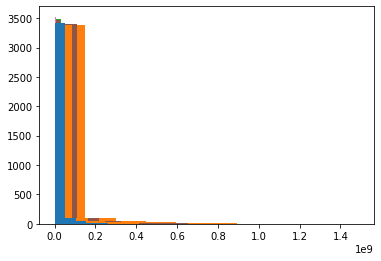

In [17]:
for col in dfx.columns:
    plt.hist(dfx[col])

In [18]:
dfx_0 =  dfx.loc[dfx['TARGET'] == 0]
dfx_1 =  dfx.loc[dfx['TARGET'] == 1]

In [19]:
ALPHA = 0.05

mannwhitneyu_same = []
mannwhitneyu_diff = []

for column in dfx.columns:
    stat, p = mannwhitneyu(dfx_0[column], dfx_1[column])
    
    if p > ALPHA:
        interpretation = 'SAME (fail to reject H0)'
        print('Statistics=%.3f, p=%.3f' % (stat, p) + ' - ' + column + ' - ' + interpretation)
        mannwhitneyu_same.append(column)
    else:
        interpretation = 'DIFFERENT (reject H0)'
        print('Statistics=%.3f, p=%.3f' % (stat, p) + ' - ' + column + ' - ' + interpretation)
        mannwhitneyu_diff.append(column)

Statistics=0.000, p=0.000 - TARGET - DIFFERENT (reject H0)
Statistics=1431544.000, p=0.998 - ALL FUNDS-TOTAL PAYROLL EXPENDITURES - SAME (fail to reject H0)
Statistics=1431387.000, p=0.994 - ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES - SAME (fail to reject H0)
Statistics=1430940.000, p=0.982 - ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES - SAME (fail to reject H0)
Statistics=1430919.000, p=0.981 - ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES - SAME (fail to reject H0)
Statistics=1431563.000, p=0.999 - ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95 - SAME (fail to reject H0)
Statistics=1430943.000, p=0.982 - ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12 - SAME (fail to reject H0)
Statistics=1431936.000, p=0.991 - ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13 - SAME (fail to reject H0)
Statistics=1431824.000, p=0.994 - ALL FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21 - SAME (fail to reject H0)
Statistics=1431895.000, p=0.992 - ALL FUNDS-CAMPUS ADMINISTRATION E

In [20]:
dfx.head()

,TARGET,ALL FUNDS-TOTAL PAYROLL EXPENDITURES,ALL FUNDS-TOTAL PROFESSIONAL & CONTRACTED SERVICES EXPENDITURES,ALL FUNDS-TOTAL SUPPLIES & MATERIALS EXPENDITURES,ALL FUNDS-TOTAL OTHER OPERATING EXPENDITURES,"ALL FUNDS-INSTRUCTION + TRANSFER EXPEND-FCT11,95","ALL FUNDS-INSTRUC RESOURCE MEDIA SERVICE, FCT12","ALL FUNDS-CURRICULUM/STAFF DEVELOPMENT EXP, FCT13","ALL FUNDS-INSTRUC LEADERSHIP EXPEND, FCT21","ALL FUNDS-CAMPUS ADMINISTRATION EXPEND, FCT23","ALL FUNDS-GUIDANCE 7 COUNSELING SERVICES EXP, FCT31","ALL FUNDS-SOCIAL WORK SERVICES EXP, FCT32","ALL FUNDS-HEALTH SERVICES EXP, FCT33","ALL FUNDS-TRANSPORTATION EXPENDITURES, FCT34","ALL FUNDS-FOOD SERVICE EXPENDITURES, FCT35","ALL FUNDS-EXTRACURRICULAR EXPENDITURES,FCT36","ALL FUNDS-GENERAL ADMINISTRAT EXPEND-FCT41,80,92","ALL FUNDS-PLANT MAINTENANCE/OPERA EXPEND, FCT51","ALL FUNDS-SECURITY/MONITORING SERVICE EXPEND, FCT5","ALL FUNDS-DATA PROCESSING SERVICES, FCT53","ALL FUNDS-COMMUNITY SERVICES, FCT61",ALL FUNDS-REGULAR PROGRAM EXPEND--11,ALL FUNDS-GIFTED/TALENTED PROGRAM EXPEND--21,ALL FUNDS-CAREER & TECHNOLOGY PGM EXPEND--22,ALL FUNDS-STUDENTS WITH DISABILITIES PGM EXPEND--23,"ALL FUNDS-STATE COMPENSATORY ED EXPEND--24, 29, 30, 34",ALL FUNDS-BILINGUAL PROGRAM EXP--25,ALL FUNDS-HIGH SCHOOL ALLOTMENT PROGRAM--91,"ALL FUNDS-PREKINDERGARTEN--32,35",ALL FUNDS-ATHLETICS PROGRAM--91,ALL FUNDS-UNDISTRIBUTED PROGRAM EXP--99
0,0,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660
1,0,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660
2,1,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660
3,0,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276
4,0,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276


In [21]:
dfx['MASTERS'] = dfx['TARGET']

In [22]:
dfx = dfx.drop(columns=['TARGET'])

In [23]:
dfx.shape

(3590, 31)

In [24]:
dfx.to_csv('../data/out/tps1.csv', index=False)

In [26]:
# remove suffix
dfx.columns = dfx.columns.str.lstrip("ALL FUNDS- ")

In [27]:
dfx.to_csv('../data/out/tps2.csv', index=False)

In [ ]:
# split data into X and y
X, y = dfx.iloc[:,:-1],dfx.iloc[:,-1]

In [ ]:
# split data into train and test sets
seed = 493
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
print(model)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
# plot feature importance
plot_importance(model)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=493)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)